# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras import models,layers

In [3]:
#upload data
dataset = pd.read_csv('archive/creditcard.csv')
dataset.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
dataset.shape

(284807, 31)

In [5]:
#check null values
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
#splitting the data
data = dataset.iloc[:,:]
targets = dataset.iloc[:,-1]
data.shape

(284807, 31)

In [7]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=.3)

In [8]:
train_data, validation_data, train_targets, validation_targets = train_test_split(train_data, train_targets, test_size=.2)

In [9]:
#Standardized the input labels
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

validation_data -= mean
validation_data /= std

In [10]:
#5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

In [11]:
network = models.Sequential()
network.add(layers.Dense(10, activation='relu',input_shape = (train_data.shape[1],) ))
network.add(layers.Dense(8, activation='relu'))
network.add(layers.Dense(6,activation='relu'))
network.add(layers.Dense(1, activation = 'sigmoid'))
network.compile(optimizer='rmsprop',loss = 'binary_crossentropy',metrics=['accuracy'])


In [12]:
history = network.fit(train_data,train_targets,epochs = 100,validation_data = (validation_data,validation_targets))

Epoch 1/100
4985/4985 [==============================] - 18s 3ms/step - loss: 0.0797 - accuracy: 0.9794 - val_loss: 8.7914e-09 - val_accuracy: 1.0000
Epoch 2/100
4985/4985 [==============================] - 10s 2ms/step - loss: 2.8375e-08 - accuracy: 1.0000 - val_loss: 8.3485e-11 - val_accuracy: 1.0000
Epoch 3/100
4985/4985 [==============================] - 10s 2ms/step - loss: 4.5248e-11 - accuracy: 1.0000 - val_loss: 2.5135e-11 - val_accuracy: 1.0000
Epoch 4/100
4985/4985 [==============================] - 10s 2ms/step - loss: 2.9032e-11 - accuracy: 1.0000 - val_loss: 1.4869e-11 - val_accuracy: 1.0000
Epoch 5/100
4985/4985 [==============================] - 10s 2ms/step - loss: 2.0511e-11 - accuracy: 1.0000 - val_loss: 1.0415e-11 - val_accuracy: 1.0000
Epoch 6/100
4985/4985 [==============================] - 9s 2ms/step - loss: 1.7388e-11 - accuracy: 1.0000 - val_loss: 7.9381e-12 - val_accuracy: 1.0000
Epoch 7/100
4985/4985 [==============================] - 9s 2ms/step - loss: 8.87

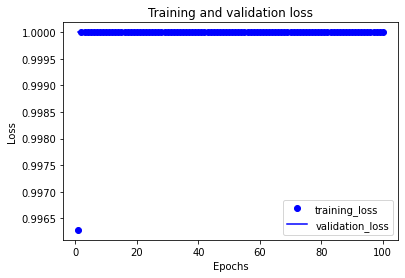

In [13]:
import matplotlib.pyplot as plt
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label = 'training_loss')
plt.plot(epochs,val_loss,'b',label='validation_loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
network.evaluate(test_data,test_targets)

2671/2671 [==============================] - 3s 1ms/step - loss: 5.4550e-12 - accuracy: 1.0000


[5.455030524514903e-12, 1.0]

In [32]:
predict = network.predict(test_data)

In [34]:
predict.shape

(85443, 1)

In [35]:
predict = predict.reshape(85443)

In [36]:
output_df = pd.DataFrame({'Actual':test_targets,'Prediction':np.round(predict)})
output_df

,Actual,Prediction
180755,0,0.0
181115,0,0.0
94645,0,0.0
170960,0,0.0
27266,0,0.0
...,...,...
129341,0,0.0
71082,0,0.0
25968,0,0.0
163208,0,0.0


In [39]:
filt = (output_df.loc[:,'Actual'] == output_df.loc[:,'Prediction'])
output_df[filt].shape

(85390, 2)

In [41]:
print(f"accuracy is :",output_df[filt].shape[0]/output_df.shape[0]*100,"%")

accuracy is : 99.93797034280163 %
